In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cellpose import io, models, plot, train

io.logger_setup()

train_dir = '/Users/noah/Downloads/Finetune/Training'
test_dir = '/Users/noah/Downloads/Finetune/Validation'



Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


2025-05-21 22:36:14,784 [INFO] WRITING LOG OUTPUT TO /Users/noah/.cellpose/run.log
2025-05-21 22:36:14,784 [INFO] 
cellpose version: 	4.0.2 
platform:       	darwin 
python version: 	3.12.9 
torch version:  	2.7.0


In [ ]:
output = io.load_train_test_data(train_dir, test_dir, image_filter="_img",
                                mask_filter="_seg.npy", look_one_level_down=False)
images, labels, image_names, test_images, test_labels, image_names_test = output

model = models.CellposeModel(gpu=True)

model_path, train_losses, test_losses = train.train_seg(model.net,
                            train_data=images, train_labels=labels,
                            test_data=test_images, test_labels=test_labels,
                            weight_decay=0.1, learning_rate=1e-5,
                            n_epochs=250, model_name="finetune 250 epochs")

2025-05-21 22:36:14,823 [INFO] not all flows are present, running flow generation for all images
2025-05-21 22:36:14,935 [INFO] 21 / 21 images in /Users/noah/Downloads/Finetune/Training folder have labels
2025-05-21 22:36:14,936 [INFO] not all flows are present, running flow generation for all images
2025-05-21 22:36:14,957 [INFO] 4 / 4 images in /Users/noah/Downloads/Finetune/Validation folder have labels
2025-05-21 22:36:14,976 [INFO] ** TORCH MPS version installed and working. **
2025-05-21 22:36:14,977 [INFO] >>>> using GPU (MPS)
2025-05-21 22:36:16,007 [INFO] >>>> loading model /Users/noah/.cellpose/models/cpsam
2025-05-21 22:36:16,423 [INFO] computing flows for labels


100%|██████████| 21/21 [00:21<00:00,  1.02s/it]

2025-05-21 22:36:37,845 [INFO] computing flows for labels



100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

2025-05-21 22:36:41,776 [INFO] >>> computing diameters



100%|██████████| 4/4 [00:00<00:00, 303.47it/s]

2025-05-21 22:36:41,864 [INFO] >>> normalizing {'lowhigh': None, 'percentile': None, 'normalize': True, 'norm3D': True, 'sharpen_radius': 0, 'smooth_radius': 0, 'tile_norm_blocksize': 0, 'tile_norm_smooth3D': 1, 'invert': False}


2025-05-21 22:36:42,756 [INFO] >>> n_epochs=250, n_train=21, n_test=4
2025-05-21 22:36:42,757 [INFO] >>> AdamW, learning_rate=0.00001, weight_decay=0.10000
2025-05-21 22:36:42,758 [INFO] >>> saving model to /Users/noah/Library/Mobile Documents/com~apple~CloudDocs/HvA/Master AAI/Afstuderen/Afstudeer Opdracht/finetune/models/finetune 250 epochs
2025-05-21 22:36:54,802 [INFO] 0, train_loss=2.5159, test_loss=1.1462, LR=0.000000, time 12.04s
2025-05-21 22:37:32,903 [INFO] 5, train_loss=1.6577, test_loss=1.0204, LR=0.000006, time 50.15s
2025-05-21 22:38:10,957 [INFO] 10, train_loss=1.6031, test_loss=0.8613, LR=0.000010, time 88.20s
2025-05-21 22:39:26,318 [INFO] 20, train_loss=1.3132, test_loss=0.9658, LR=0.000010, time 163.56s
2025-05-21 22:40:41,770 [INFO] 30, train_loss=1.3142, test_loss=1.2516, LR=0.000010, time 239.01s
2025-05-21 22:41:57,097 [INFO] 40, train_loss=1.3769, test_loss=0.9384, LR=0.000010, time 314.34s
2025-05-21 22:43:12,321 [INFO] 50, train_loss=1.2612, test_loss=1.2347, 

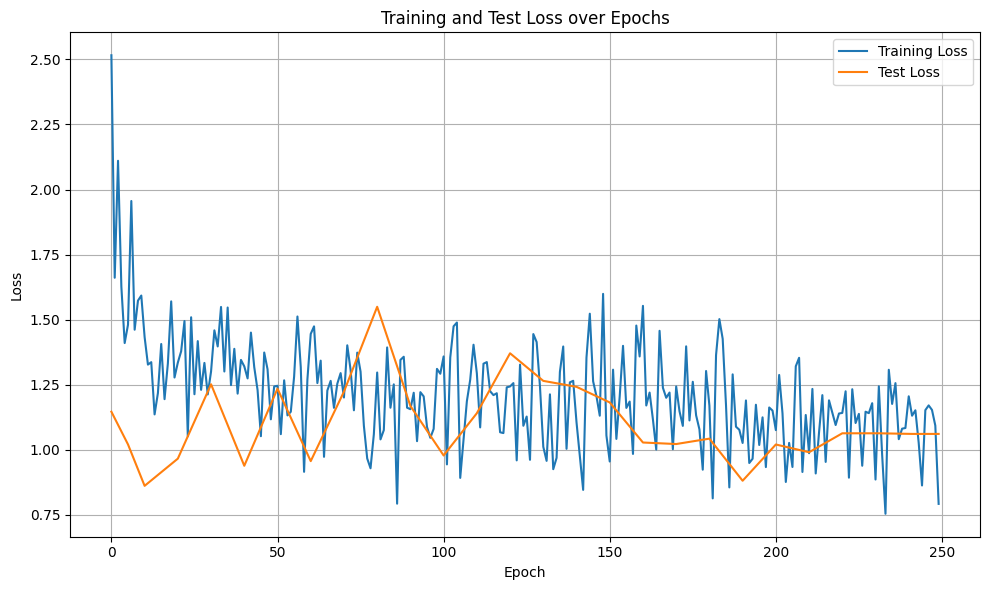

In [10]:
x = np.arange(len(test_losses))
mask = test_losses != 0
test_losses_interp = np.interp(x, x[mask], test_losses[mask])
test_losses_interp

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses_interp, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
test_losses_interp

array([1.14616324, 1.12101601, 1.09586877, 1.07072154, 1.0455743 ,
       1.02042707, 0.98860583, 0.95678459, 0.92496334, 0.8931421 ,
       0.86132086, 0.87177264, 0.88222443, 0.89267621, 0.903128  ,
       0.91357978, 0.92403156, 0.93448335, 0.94493513, 0.95538692,
       0.9658387 , 0.99441613, 1.02299355, 1.05157097, 1.0801484 ,
       1.10872582, 1.13730325, 1.16588067, 1.1944581 , 1.22303552,
       1.25161295, 1.22029226, 1.18897157, 1.15765088, 1.12633019,
       1.09500951, 1.06368882, 1.03236813, 1.00104744, 0.96972675,
       0.93840607, 0.96803491, 0.99766376, 1.0272926 , 1.05692145,
       1.08655029, 1.11617914, 1.14580798, 1.17543683, 1.20506567,
       1.23469452, 1.20684873, 1.17900294, 1.15115716, 1.12331137,
       1.09546558, 1.06761979, 1.03977401, 1.01192822, 0.98408243,
       0.95623665, 0.98294333, 1.00965001, 1.03635669, 1.06306337,
       1.08977006, 1.11647674, 1.14318342, 1.1698901 , 1.19659678,
       1.22330347, 1.25590886, 1.28851424, 1.32111963, 1.35372

2025-05-22 01:10:25,022 [INFO] ** TORCH MPS version installed and working. **
2025-05-22 01:10:25,023 [INFO] >>>> using GPU (MPS)
2025-05-22 01:10:28,114 [INFO] >>>> loading model models/finetune 250 epochs


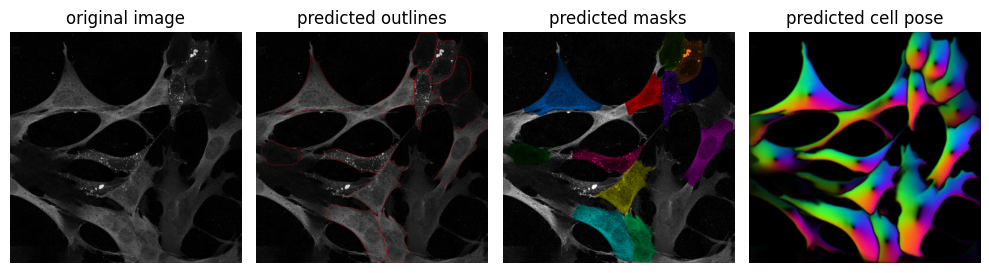

In [16]:
model = models.CellposeModel(pretrained_model='models/finetune 250 epochs',gpu=True)

img = io.imread('/Users/noah/Downloads/Finetune/Testing/8_img.tif')

masks, flows, styles = model.eval(img)

fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, img, masks, flows[0], channels=[0, 0])
plt.tight_layout()
plt.show()